
# NYC Airbnb Data Analysis Project


## **Dataset Overview**  📊

In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("vrindakallu/new-york-dataset")
df = pd.read_csv(f'{path}/new_york_listings_2024.csv')


In [2]:
# Display the first 5 rows of the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [3]:
# Get a summary of the DataFrame (columns, data types, and missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [4]:
# Check basic statistics for numerical columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


## **Step 2: Data Cleaning**  🧹

In [5]:
# Checking for missing values
missing_data = df.isnull().sum()
print("Missing values:\n", missing_data)

Missing values:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64


In [6]:
# Checking for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


## **Step 3: Exploratory Data Analysis (EDA)** 📈

In [7]:
# Describing only the relevant columns
relevant_columns = ['price', 'minimum_nights', 'number_of_reviews',
                    'reviews_per_month', 'calculated_host_listings_count',
                    'availability_365', 'bedrooms', 'beds', 'baths', 'rating']

df[relevant_columns].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,beds
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,1.723721
std,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,1.212272
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,1.000000
25%,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000
50%,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,1.000000
75%,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,2.000000
max,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,42.000000



Now let's dive into the results of the `describe()` function and the metrics we have in front of us, to gain a better understanding of the characteristics of this dataset:

 **Price**:
- The average price of an Airbnb listing in New York City is around **\$188** per night.
- However, there’s a **wide variation** in prices, with some listings costing as low as **\$10** and some reaching extreme outliers of **\$100,000** (likely luxury or unique properties).
- The high standard deviation (**\$1022.80**) indicates that while most listings are in the lower range, a few **very high-priced listings** skew the data.

**Minimum Nights**:
- On average, hosts require a minimum stay of around **28 nights**, which is relatively high. This suggests that some listings are targeting **longer-term stays**.
- While some listings allow **1-night stays**, others require a minimum stay of **1250 nights**, indicating long-term rental options for certain properties.

**Number of Reviews**:
- The average listing has received around **43 reviews**. However, this varies significantly, with some listings having only **1 review**, while others have up to **1865 reviews**, reflecting the popularity and frequency of bookings.


 **Reviews Per Month**:
- On average, listings receive **1.26 reviews per month**, which suggests consistent booking activity.
- Some listings receive as many as **75 reviews per month**, indicating extremely high turnover and popularity.


**Host Listings**:
- On average, hosts manage **18.8 listings**, which suggests that many hosts on the platform are **professional property managers**.
- Some hosts manage only **1 listing**, typical of individual hosts, while the most active hosts manage up to **713 listings**, likely indicating commercial hosts.

**Availability (365 Days)**:
- Listings are available for an average of **206 days per year**, meaning many listings are booked or unavailable for a portion of the year.
- Some listings are available for **365 days** a year, while others are fully booked (or unavailable) for the entire year.

**Beds**:
- The average listing offers **1.72 beds**, indicating that many properties are small, likely **1-bedroom apartments or studios**. The maximum number of beds in a listing is **42**, suggesting that there are some large, group-oriented properties.


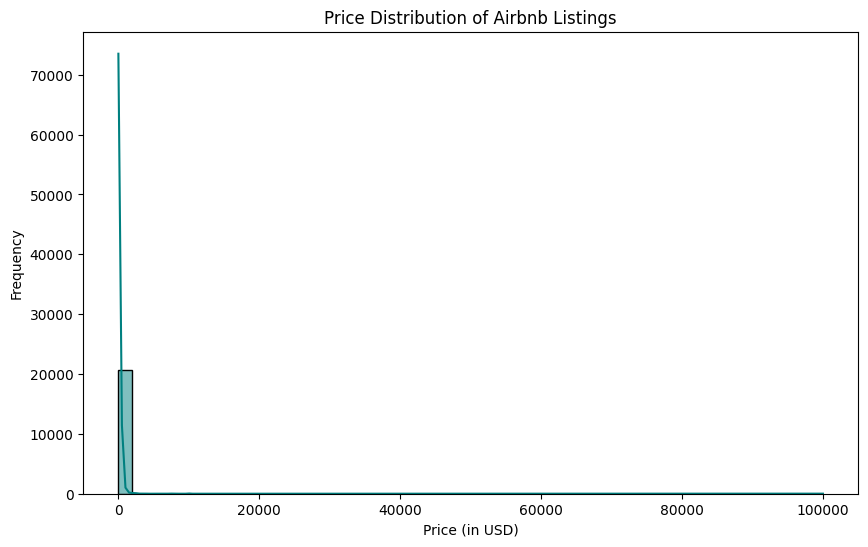

In [8]:
# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='teal')
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.show()

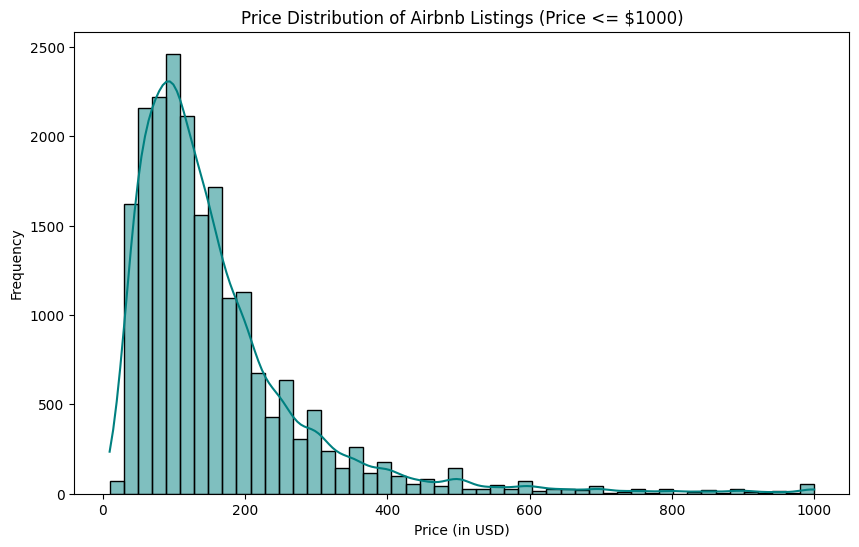

In [9]:
# Apply a cap to prices to remove extreme outliers
filtered_df = df[df['price'] <= 1000]

plt.figure(figsize=(10,6))
sns.histplot(filtered_df['price'], bins=50, kde=True, color='teal')
plt.title('Price Distribution of Airbnb Listings (Price <= $1000)')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.show()